In [3]:
import pandas as pd
import numpy as np

In [4]:
folder = 'dataframes_isp/data_Nude_Project_UCmCg86gXHnROv4ZIXbdGWlg'

df_categories = pd.read_csv(f'./{folder}/df_categories.csv')
df_comments = pd.read_csv(f'./{folder}/df_comments.csv')
df_transcript = pd.read_csv(f'./{folder}/df_transcript.csv')
df_videos = pd.read_csv(f'./{folder}/df_videos.csv')
df_stats = pd.read_csv(f'./{folder}/df_channel_stats.csv')

FileNotFoundError: [Errno 2] No such file or directory: './dataframes_isp/data_Nude_Project_UCmCg86gXHnROv4ZIXbdGWlg/df_categories.csv'

In [ ]:
df_categories.head()

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [ ]:
df_comments.head()
df_comments['like_count'] = pd.to_numeric(df_comments['like_count'], errors='coerce').fillna(0).astype(int)

In [ ]:
df_comments['like_count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 76145 entries, 0 to 76144
Series name: like_count
Non-Null Count  Dtype
--------------  -----
76145 non-null  int64
dtypes: int64(1)
memory usage: 595.0 KB


In [ ]:
df_transcript.head()

,video_id,transcript
0,3BbSreQ8_Dg,Hola Te voy a dar 20 segundos para\nromper est...
1,3C6lJJNl0a4,dónde dirías que vive la gente más feliz\nen E...
2,NB4_smU3OAg,faltan mujeres referentes O sea que no\nes\nta...
3,jIi6dcO5Qro,josemi No creo que se llama creo que\nacabó co...
4,JQG1oezbMVk,las apneas es la dificultad de respirar\neh lo...


In [ ]:
df_videos.head()

,videoId,title,description,publishedAt,thumbnail_url,tags,live_broadcast,categoryId,viewCount,likeCount,commentCount,licensed,duration,caption
0,3BbSreQ8_Dg,@G-SHOCK #nudeproject #clothingbrand #parati,NaN,2024-08-09T22:00:02Z,https://i.ytimg.com/vi/3BbSreQ8_Dg/default.jpg,"['nude project', 'nude project podcast']",none,22,2410,89,9,True,PT49S,False
1,3C6lJJNl0a4,Cuál es el país más feliz del mundo 🌎: según C...,NaN,2024-08-09T13:00:08Z,https://i.ytimg.com/vi/3C6lJJNl0a4/default.jpg,"['nude project', 'nude project podcast']",none,22,5230,174,4,True,PT31S,False
2,NB4_smU3OAg,"Faltan mujeres referentes, Yaiza Canosa en Nud...",NaN,2024-08-08T13:00:19Z,https://i.ytimg.com/vi/NB4_smU3OAg/default.jpg,"['nude project', 'nude project podcast']",none,22,7194,194,19,True,PT53S,False
3,jIi6dcO5Qro,"""A los niños los tenían reventados"",Jordi Sánc...",NaN,2024-08-07T13:00:57Z,https://i.ytimg.com/vi/jIi6dcO5Qro/default.jpg,"['nude project', 'nude project podcast']",none,22,5219,212,0,True,PT33S,False
4,JQG1oezbMVk,"Si te pasa esto puedes ser SONÁMBULO, Dr. Esti...",NaN,2024-08-06T13:00:17Z,https://i.ytimg.com/vi/JQG1oezbMVk/default.jpg,"['nude project', 'nude project podcast']",none,22,6219,204,0,True,PT25S,False


<Figure size 864x576 with 0 Axes>

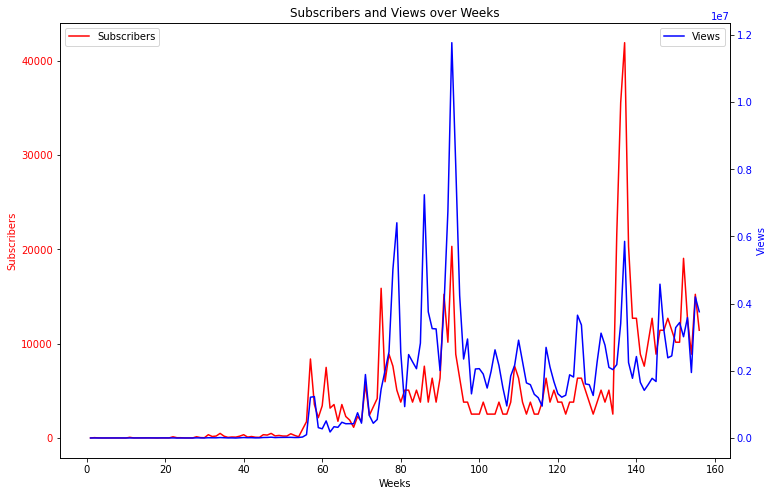

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotting 'subs' against 'week' on the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df_stats['week'].to_numpy(), df_stats['subs'].to_numpy(), color='red', label='Subscribers')
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Subscribers', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Creating a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_stats['week'].to_numpy(), df_stats['views'].to_numpy(), color='blue', label='Views')
ax2.set_ylabel('Views', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding title
plt.title('Subscribers and Views over Weeks')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

In [ ]:
correlation = df_stats['subs'].corr(df_stats['views'])
correlation

0.6399424681746294

In [ ]:
df_videos['publishedAt'] = pd.to_datetime(df_videos['publishedAt'])

In [ ]:
from datetime import datetime

df_videos['day'] = df_videos['publishedAt'].dt.strftime('%d-%m-%y')
df_videos['day'] = pd.to_datetime(df_videos['day'], format='%d-%m-%y')
df_videos['day']

0      2024-08-09
1      2024-08-09
2      2024-08-08
3      2024-08-07
4      2024-08-06
          ...    
1286   2021-07-26
1287   2021-07-25
1288   2021-07-25
1289   2021-07-25
1290   2021-07-22
Name: day, Length: 1291, dtype: datetime64[ns]

In [ ]:
stats_day = df_videos.groupby('day')[['likeCount', 'viewCount']].sum().reset_index()
stats_day['week_period'] = stats_day['day'].dt.to_period('W')
stats_week = stats_day.drop(columns='day').groupby('week_period').sum().reset_index()
stats_week

,week_period,likeCount,viewCount
0,2021-07-19/2021-07-25,942,47014
1,2021-07-26/2021-08-01,2377,57441
2,2021-08-09/2021-08-15,128,6899
3,2021-10-18/2021-10-24,265,9880
4,2021-11-29/2021-12-05,312,18039
...,...,...,...
118,2024-07-08/2024-07-14,4413,117563
119,2024-07-15/2024-07-21,13412,330083
120,2024-07-22/2024-07-28,334961,6892588
121,2024-07-29/2024-08-04,1846,68611


In [ ]:
df_stats['week_period'] = pd.to_datetime(df_stats['start_date']).dt.to_period('W')
df_stats['week_period'][0].start_time

Timestamp('2021-08-09 00:00:00')

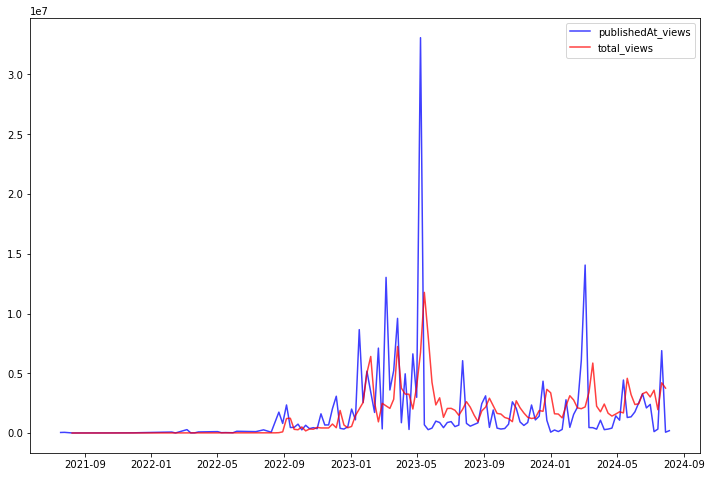

In [ ]:
stats_week = stats_day.drop(columns='day').groupby('week_period').sum().reset_index()

plt.figure(figsize=(12,8))
plt.plot(stats_week['week_period'].dt.start_time.to_numpy(), stats_week['viewCount'].to_numpy(), color='blue', alpha=0.75, label='publishedAt_views')
plt.plot(df_stats['week_period'].dt.start_time.to_numpy(), df_stats['views'].to_numpy(), color='red', alpha=0.75, label='total_views')
plt.legend()
plt.show();

In [ ]:
views_published_correlation = df_stats['views'].corr(stats_week['viewCount'])
corr_abs = np.abs(views_published_correlation)
corr_abs

0.07927719507697141

# Standarize Views vs Subscription comparison

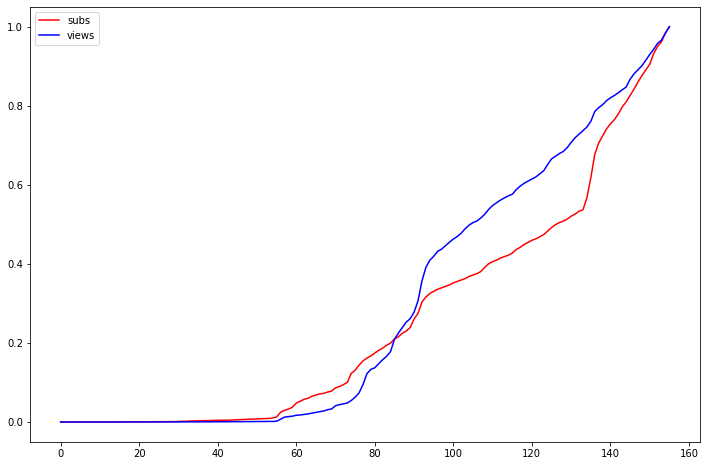

In [ ]:
# Standarize Views vs Subscription comparison

plt.figure(figsize=(12,8))
(df_stats['subs'].cumsum()/df_stats['subs'].sum()).plot(color='red')
(df_stats['views'].cumsum()/df_stats['views'].sum()).plot(color='blue')
plt.legend()
plt.show();

# Views & Subscription KPIs

In [ ]:
df_stats

,Unnamed: 0,subs,views,week,start_date,end_date,subs_cumsum,views_cumsum,week_period
0,0,6.0,1305.0,1,2021-08-09,2021-08-15,6.0,1305.0,2021-08-09/2021-08-15
1,1,41.0,1431.0,2,2021-08-16,2021-08-22,47.0,2736.0,2021-08-16/2021-08-22
2,2,17.0,1265.0,3,2021-08-23,2021-08-29,64.0,4001.0,2021-08-23/2021-08-29
3,3,5.0,1230.0,4,2021-08-30,2021-09-05,69.0,5231.0,2021-08-30/2021-09-05
4,4,8.0,1155.0,5,2021-09-06,2021-09-12,77.0,6386.0,2021-09-06/2021-09-12
...,...,...,...,...,...,...,...,...,...
151,151,19039.0,3015585.0,152,2024-07-01,2024-07-07,658768.0,221632908.0,2024-07-01/2024-07-07
152,152,12691.0,3585000.0,153,2024-07-08,2024-07-14,671459.0,225217908.0,2024-07-08/2024-07-14
153,153,8883.0,1950579.0,154,2024-07-15,2024-07-21,680342.0,227168487.0,2024-07-15/2024-07-21
154,154,15230.0,4201086.0,155,2024-07-22,2024-07-28,695572.0,231369573.0,2024-07-22/2024-07-28


In [ ]:
subs_kpi = []
for n in range(0, len(df_stats['subs_cumsum'])):
    if n == 0:
        subs_kpi.append(0)
    else:
        subs_kpi.append(((df_stats['subs_cumsum'][n] / (df_stats['subs_cumsum'][n - 1]) - 1) * 100).round(2))

df_stats['subs_kpi'] = pd.Series(subs_kpi)

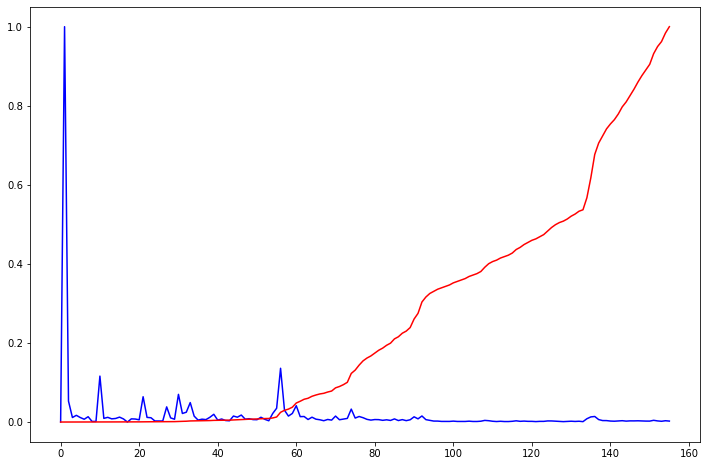

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
plt.plot(df_stats['subs_kpi'] / df_stats['subs_kpi'].max(), color='blue')
plt.plot(df_stats['subs_cumsum'] / df_stats['subs_cumsum'].max(), color='red')

In [ ]:
df_comments.head()

,comment_id,kind,author,author_channel_id,text,like_count,published_at,updated_at,canRate,viewerRating,canReply,totalReplyCount,isPublic,video_id
0,Ugyq5nIaU-1IHd9XPjB4AaABAg,youtube#commentThreadListResponse,@LuzGonzalez-gw9ic,UCTkF0ZVLtlFnc9_jcsuHvIQ,Es miooo. Si lo tiras del 4 piso yo lo recibo 🎉,0,2024-08-10T09:15:38Z,2024-08-10T09:15:38Z,True,none,True,0.0,True,3BbSreQ8_Dg
1,Ugwpfh3GbB75IYPvI-B4AaABAg,youtube#commentThreadListResponse,@Batman14388,UCb3d6Ru1exBTzlN-Zx99m3A,k pasa,0,2024-08-10T07:35:21Z,2024-08-10T07:35:21Z,True,none,True,0.0,True,3BbSreQ8_Dg
2,UgynWFA9OQjvhAPF7yl4AaABAg,youtube#commentThreadListResponse,@ErManolitothreethousand,UC8IRx0FzSKVx86bW9M91LAA,Me uno al sorteo!!!!,0,2024-08-10T00:58:20Z,2024-08-10T00:58:20Z,True,none,True,0.0,True,3BbSreQ8_Dg
3,Ugw5mffBN8GcQgQtJsJ4AaABAg,youtube#commentThreadListResponse,@toninavarro3868,UCaLMhDkp6v6BYgQF6Mraztg,Pues aquí estamos a ver si toca!!,0,2024-08-10T00:04:31Z,2024-08-10T00:04:31Z,True,none,True,0.0,True,3BbSreQ8_Dg
4,UgzKmMFaHwpG6HYFb8V4AaABAg,youtube#commentThreadListResponse,@Jara-,UCQydswFeBxeGNpVDnDYINfg,Holaa,0,2024-08-09T23:23:34Z,2024-08-09T23:23:34Z,True,none,True,0.0,True,3BbSreQ8_Dg


In [ ]:
df_stats['subs_cumsum'].head()

0     6.0
1    47.0
2    64.0
3    69.0
4    77.0
Name: subs_cumsum, dtype: float64

# More commented video

In [ ]:
df_comments.head()

,comment_id,kind,author,author_channel_id,text,like_count,published_at,updated_at,canRate,viewerRating,canReply,totalReplyCount,isPublic,video_id
0,Ugyq5nIaU-1IHd9XPjB4AaABAg,youtube#commentThreadListResponse,@LuzGonzalez-gw9ic,UCTkF0ZVLtlFnc9_jcsuHvIQ,Es miooo. Si lo tiras del 4 piso yo lo recibo 🎉,0,2024-08-10T09:15:38Z,2024-08-10T09:15:38Z,True,none,True,0.0,True,3BbSreQ8_Dg
1,Ugwpfh3GbB75IYPvI-B4AaABAg,youtube#commentThreadListResponse,@Batman14388,UCb3d6Ru1exBTzlN-Zx99m3A,k pasa,0,2024-08-10T07:35:21Z,2024-08-10T07:35:21Z,True,none,True,0.0,True,3BbSreQ8_Dg
2,UgynWFA9OQjvhAPF7yl4AaABAg,youtube#commentThreadListResponse,@ErManolitothreethousand,UC8IRx0FzSKVx86bW9M91LAA,Me uno al sorteo!!!!,0,2024-08-10T00:58:20Z,2024-08-10T00:58:20Z,True,none,True,0.0,True,3BbSreQ8_Dg
3,Ugw5mffBN8GcQgQtJsJ4AaABAg,youtube#commentThreadListResponse,@toninavarro3868,UCaLMhDkp6v6BYgQF6Mraztg,Pues aquí estamos a ver si toca!!,0,2024-08-10T00:04:31Z,2024-08-10T00:04:31Z,True,none,True,0.0,True,3BbSreQ8_Dg
4,UgzKmMFaHwpG6HYFb8V4AaABAg,youtube#commentThreadListResponse,@Jara-,UCQydswFeBxeGNpVDnDYINfg,Holaa,0,2024-08-09T23:23:34Z,2024-08-09T23:23:34Z,True,none,True,0.0,True,3BbSreQ8_Dg


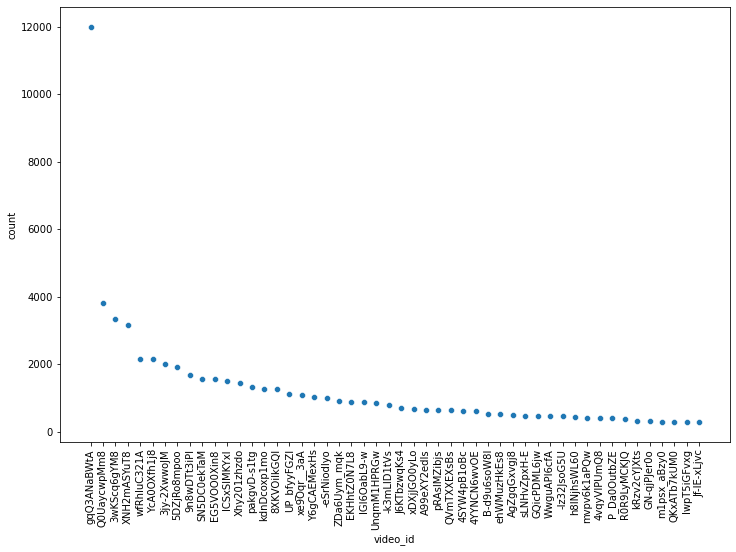

In [ ]:
# More commented video
plt.figure(figsize=(12,8))
sns.scatterplot(df_comments['video_id'].value_counts()[:50])
plt.xticks(rotation=90)
plt.show;

In [ ]:
df_videos[df_videos['videoId'] == df_comments['video_id'].value_counts().index[0]]

,videoId,title,description,publishedAt,thumbnail_url,tags,live_broadcast,categoryId,viewCount,likeCount,commentCount,licensed,duration,caption,day
244,gqQ3ANaBWtA,La Demostración Científica de que la Reencarna...,El Doctor Manel Sans Segarra visita el podcast...,2024-03-03 18:00:19+00:00,https://i.ytimg.com/vi/gqQ3ANaBWtA/default.jpg,"['Hay vida después de la muerte', 'muerte', 'r...",none,22,5969433,188435,15648,True,PT1H33M8S,False,2024-03-03


In [ ]:
df_comments['like_count'] = df_comments['like_count'].to_numpy()
df_comments

,comment_id,kind,author,author_channel_id,text,like_count,published_at,updated_at,canRate,viewerRating,canReply,totalReplyCount,isPublic,video_id
0,Ugyq5nIaU-1IHd9XPjB4AaABAg,youtube#commentThreadListResponse,@LuzGonzalez-gw9ic,UCTkF0ZVLtlFnc9_jcsuHvIQ,Es miooo. Si lo tiras del 4 piso yo lo recibo 🎉,0,2024-08-10T09:15:38Z,2024-08-10T09:15:38Z,True,none,True,0.0,True,3BbSreQ8_Dg
1,Ugwpfh3GbB75IYPvI-B4AaABAg,youtube#commentThreadListResponse,@Batman14388,UCb3d6Ru1exBTzlN-Zx99m3A,k pasa,0,2024-08-10T07:35:21Z,2024-08-10T07:35:21Z,True,none,True,0.0,True,3BbSreQ8_Dg
2,UgynWFA9OQjvhAPF7yl4AaABAg,youtube#commentThreadListResponse,@ErManolitothreethousand,UC8IRx0FzSKVx86bW9M91LAA,Me uno al sorteo!!!!,0,2024-08-10T00:58:20Z,2024-08-10T00:58:20Z,True,none,True,0.0,True,3BbSreQ8_Dg
3,Ugw5mffBN8GcQgQtJsJ4AaABAg,youtube#commentThreadListResponse,@toninavarro3868,UCaLMhDkp6v6BYgQF6Mraztg,Pues aquí estamos a ver si toca!!,0,2024-08-10T00:04:31Z,2024-08-10T00:04:31Z,True,none,True,0.0,True,3BbSreQ8_Dg
4,UgzKmMFaHwpG6HYFb8V4AaABAg,youtube#commentThreadListResponse,@Jara-,UCQydswFeBxeGNpVDnDYINfg,Holaa,0,2024-08-09T23:23:34Z,2024-08-09T23:23:34Z,True,none,True,0.0,True,3BbSreQ8_Dg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76140,Ugx9NnzJjBmm10BU9aR4AaABAg,youtube#commentThreadListResponse,@thepierobs8586,UCCoPsMI3729EMe9f4LK5n2g,Aqui despues de que su ex le haya quitado el s...,4,2024-08-05T11:23:33Z,2024-08-05T11:23:33Z,True,none,True,0.0,True,zbJeJXERbGw
76141,Ugy6xfB_D31yppK1lVp4AaABAg,youtube#commentThreadListResponse,@joaquincabana5969,UCFcBuBHtTyQ14TQl1ykCscw,Animales<br>— Garras<br>— Dientes y colmillos<...,3,2024-08-05T00:00:17Z,2024-08-05T00:00:17Z,True,none,True,0.0,True,zbJeJXERbGw
76142,Ugzazimq55qWojuKEPV4AaABAg,youtube#commentThreadListResponse,@MrsHyde92,UCJCtToDNcKxCpuaxnlIqVaA,"Actualización agosto de 2024: efectivamente, e...",3,2024-08-04T14:20:07Z,2024-08-04T14:20:07Z,True,none,True,0.0,True,zbJeJXERbGw
76143,UgxvEzvEeLBtQXRFcLd4AaABAg,youtube#commentThreadListResponse,@emirvalencia7591,UCxypTBZmgSSfPeS-5h6pseg,Tenía razón Frank ahora lo traicionaron 😢,1,2024-08-04T07:05:38Z,2024-08-04T07:05:38Z,True,none,True,0.0,True,zbJeJXERbGw


# Video Likes vs Comments Likes

In [ ]:
# Comment likes per video
df_comments['like_count'] = df_comments['like_count'].to_numpy()

comment_likes_video = df_comments.groupby('video_id')['like_count'].sum().reset_index()
comment_likes_video.rename(columns={'video_id': 'videoId'}, inplace=True)
comment_likes_video

# Likes per video
likes_video = df_videos['likeCount'].copy()

# Merge dataframe
df_merged = pd.merge(comment_likes_video, df_videos, on='videoId', how='inner')

# Plot
# plt.plot(df_merged['videoId'].values, df_merged['likeCount'].to_numpy(), color='red')
# plt.plot(df_merged['videoId'].values, df_merged['like_count'].to_numpy(), color='blue')
# plt.show();

In [ ]:
df_comments['like_count'] = df_comments['like_count'].fillna('0')
df_comments['like_count'] = df_comments['like_count'].astype(int)

<AxesSubplot:ylabel='likes_comment_likes'>

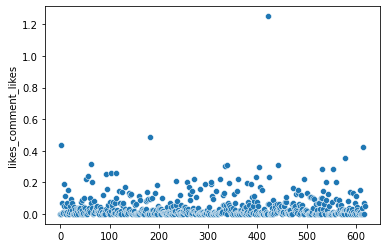

In [ ]:

df_merged['likes_comment_likes'] = df_merged['like_count'].to_numpy() / df_merged['likeCount'].to_numpy()

sns.scatterplot(df_merged['likes_comment_likes'])

In [ ]:
df_merged

,videoId,like_count,title,description,publishedAt,thumbnail_url,tags,live_broadcast,categoryId,viewCount,likeCount,commentCount,licensed,duration,caption,day,likes_comment_likes
0,-0FWPMmWyGg,0,¿Qué disciplina nos recomienda aprender Ilia? ...,NaN,2024-05-31 13:00:00+00:00,https://i.ytimg.com/vi/-0FWPMmWyGg/default.jpg,"['nude project', 'nude project podcast']",none,22,17914,715,5,True,PT29S,False,2024-05-31,0.000000
1,-9DEmuZfow8,0,No paramos 🤎🌎,NaN,2023-12-03 19:00:00+00:00,https://i.ytimg.com/vi/-9DEmuZfow8/default.jpg,"['nude project', 'nude project podcast']",none,22,4928,107,1,True,PT12S,False,2023-12-03,0.000000
2,-Iz32JsoG5U,6206,Conocemos a Naiara tras Ganar OT 2023,"La ganadora de Operación Triunfo 2023, Naiara ...",2024-02-25 18:00:00+00:00,https://i.ytimg.com/vi/-Iz32JsoG5U/default.jpg,"['Operación Triunfo 2023', 'OT', 'Naiara OT', ...",none,22,513520,14158,520,True,PT1H8M10S,False,2024-02-25,0.438339
3,-NcNUfcYlTo,3,Naiara habla sobre su Relación con Lucas 🤔 Nud...,NaN,2024-02-26 20:18:29+00:00,https://i.ytimg.com/vi/-NcNUfcYlTo/default.jpg,[],none,22,13605,415,2,True,PT29S,False,2024-02-26,0.007229
4,-OZ3gMYzarw,2292,“LO MVTAMOS” 👿 La Calle de Iñigo Quintero,NaN,2023-12-13 19:51:02+00:00,https://i.ytimg.com/vi/-OZ3gMYzarw/default.jpg,[],none,22,591742,33186,120,True,PT50S,False,2023-12-13,0.069065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,zDe4wD-wSPs,0,Efectivamente están guapísimos 🥵,NaN,2024-05-11 17:00:40+00:00,https://i.ytimg.com/vi/zDe4wD-wSPs/default.jpg,"['nude project', 'nude project podcast']",none,22,9715,204,1,True,PT33S,False,2024-05-11,0.000000
615,zNFL5ZazwHQ,45,"👉 Anécdota con el DEMONIO, Rojuu | Nude Projec...",NaN,2024-04-16 17:19:03+00:00,https://i.ytimg.com/vi/zNFL5ZazwHQ/default.jpg,[],none,22,5791,107,9,True,PT36S,False,2024-04-16,0.420561
616,z_AxRF1bUaY,31,"Así nació VICIO, Oriol de Pablo en Nude Projec...",NaN,2024-07-29 13:01:03+00:00,https://i.ytimg.com/vi/z_AxRF1bUaY/default.jpg,"['nude project', 'nude project podcast']",none,22,24258,433,6,True,PT39S,False,2024-07-29,0.071594
617,zbJeJXERbGw,31,Frank Cuesta 🐍 Dice Cuál Es El Animal Más Peli...,Todo comenzó en una habitación universitaria.....,2023-05-09 14:00:41+00:00,https://i.ytimg.com/vi/zbJeJXERbGw/default.jpg,"['nude project', 'nude project podcast']",none,22,6017832,468769,3083,True,PT37S,False,2023-05-09,0.000066


# Viewer with most comments

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


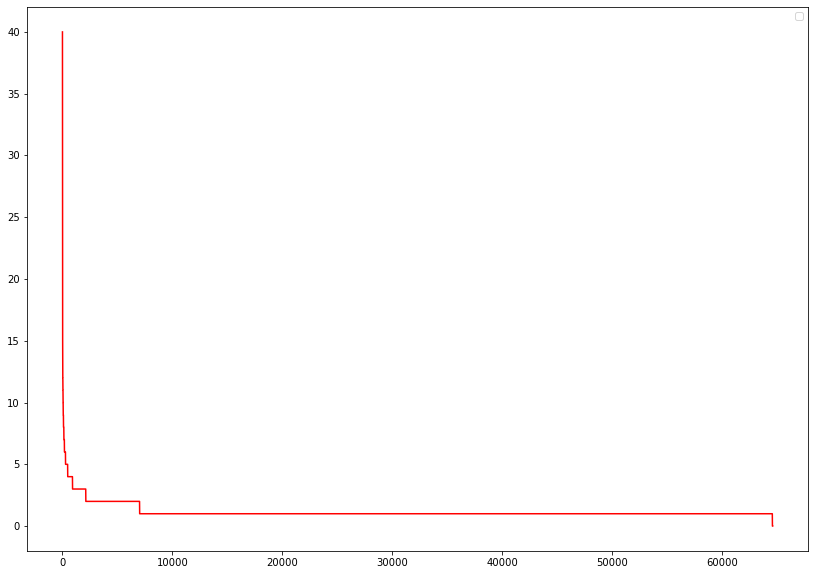

In [ ]:
viewers = df_comments.groupby(['author', 'like_count'])['video_id'].agg(videos_count = 'count').reset_index()
viewers.sort_values('videos_count',ascending=False, inplace=True, ignore_index=True)


# Plot with hue for 'like_count' and size for 'videos_count'
plt.figure(figsize=(14, 10))
plt.plot(viewers['videos_count'], color='red')
plt.legend()
# Display the plot
plt.show()

In [ ]:
viewers

,author,like_count,videos_count
0,@bertaruizcarramolino6806,0,40
1,@_.enri0580,0,37
2,@cristobaldiaznavarro1860,0,28
3,@andreabernal8144,0,21
4,@AndreaBioko,0,21
...,...,...,...
64558,2023-11-19T23:54:45Z,0,0
64559,2023-11-19T23:55:09Z,0,0
64560,2023-11-19T23:56:12Z,0,0
64561,2023-05-21T20:36:01Z,0,0


# Sentiment Analysis

In [ ]:
from textblob import TextBlob
import pandas as pd
import re

# Supongamos que ya tienes un dataframe llamado df_comments con una columna 'text' que contiene los comentarios.

df_test = df_comments[:100].copy()

# Función para limpiar el texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Elimina URLs
    text = re.sub(r'\d+', '', text)  # Elimina números
    text = re.sub(r'[^\w\s]', '', text)  # Elimina puntuaciones
    return text

# Aplicar limpieza de texto
df_test['clean_text'] = df_test['text'].apply(clean_text)

# Función para analizar el sentimiento
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Aplicar análisis de sentimiento
df_test['sentiment'] = df_test['clean_text'].apply(get_sentiment)

In [ ]:
from googletrans import Translator
from transformers import AutoTokenizer, RobertaModel
import torch

# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")
translator = Translator()

# Ejemplo de comentarios
comentarios = df_test['clean_text'][:1000].values

# Función para traducir y analizar el sentimiento
def analizar_sentimiento(comentario):
    # Traducir comentario al inglés
    """
    if comentario:
        traduccion = translator.translate(comentario, src='es', dest='en').text
    else:
        traduccion = ' '
    # Analizar sentimiento
    """
    resultado = pipe(comentario)[0]
    return int(resultado['label'][0])

# Aplicar análisis a cada comentario
resultados = []
i = 0
for comentario in df_test['clean_text'][:1000]:
    resultados.append(analizar_sentimiento(comentario))
    i += 1
    print(f'{i}')

# Crear un DataFrame
df_sentiment = pd.DataFrame({'Comentario': comentarios, 'Sentimiento': resultados})
df_sentiment

/home/ivanseldasp/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


,Comentario,Sentimiento
0,es miooo si lo tiras del piso yo lo recibo,1
1,k pasa,5
2,me uno al sorteo,5
3,pues aquí estamos a ver si toca,3
4,holaa,1
...,...,...
95,soy fan suyo pero es un mentiroso si no es por...,1
96,que está haciendo,5
97,semana sin podcast,1
98,se deja nigeria,1


In [ ]:
comentario = df_test.head(1)['clean_text'].values
traduccion = translator.translate(comentario, src='es', dest='en').text
traduccion

"['it's mine if you throw it off the floor I'll get it']"

In [ ]:
df_test['clean_text'][:10].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10 entries, 0 to 9
Series name: clean_text
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 208.0+ bytes


In [ ]:
df_test = df_comments.astype(str).copy()
len(df_test)

76145

In [ ]:
df_test = pd.read_csv('./dataframes_isp/data_Nude_Project_UCmCg86gXHnROv4ZIXbdGWlg/df_transcript.csv')
df_test.dropna(inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 0 to 1286
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   video_id    1102 non-null   object
 1   transcript  1102 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


# TD-IDF y NUBE DE PALABRAS

In [6]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Función para limpiar el texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Elimina URLs
    text = re.sub(r'\d+', '', text)  # Elimina números
    text = re.sub(r'[^\w\s]', '', text)  # Elimina puntuaciones
    return text

# Aplicar limpieza de texto
df_test = pd.read_csv('../data/df_comments_video.csv')
df_test.dropna(inplace=True)
df_test['clean_text'] = df_test['text'].astype(str).apply(clean_text)

# Descargar stopwords de NLTK (si no lo has hecho previamente)
nltk.download('stopwords')

# Obtener las stopwords en español
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    meaningful_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(meaningful_words)

# Eliminar stopwords de los comentarios
df_test['clean_text'] = df_test['clean_text'].apply(remove_stopwords)

/tmp/ipykernel_6326/1913159091.py:18: DtypeWarning: Columns (5,8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('../data/df_comments_video.csv')
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=None, strip_accents='ascii')

# Ajustar y transformar el texto
tfidf_matrix = tfidf_vectorizer.fit_transform(df_test['clean_text'])

# Obtener las palabras y sus respectivos puntajes TF-IDF
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).tolist()[0]))

# Mostrar las palabras con sus puntajes TF-IDF
len(tfidf_scores)

75750

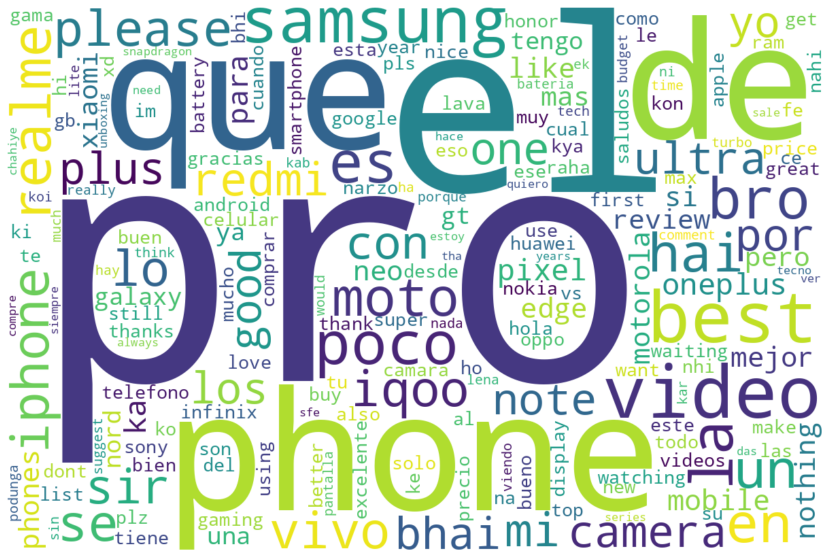

In [8]:
# Crear una nube de palabras
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate_from_frequencies(tfidf_scores)

# Mostrar la nube de palabras
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.show()

In [9]:
# Ordenar las palabras por su puntaje TF-IDF
top_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20]

# Mostrar las top 20 palabras
print("Top 20 palabras:")
for word, score in top_words:
    print(f"{word}: {score}")

Top 20 palabras:
pro: 4076.011584797574
el: 4038.192636846006
phone: 3477.55894755024
que: 3431.4750252047784
de: 3383.4643042761145
video: 2993.815738605952
best: 2840.0395524302753
samsung: 2675.750085344401
poco: 2319.230357858015
la: 2274.82561854065
es: 2190.6249223317054
bro: 2105.2761043046658
en: 2012.8461809608393
realme: 1949.037765484533
moto: 1863.8207308745657
hai: 1855.4975780668897
un: 1840.3654691847382
iphone: 1750.3303042612333
se: 1725.1349429873126
vivo: 1676.1505949333928


# FEATURE ENGINEERING

* Edad del Comentario: Calcula la edad del comentario con respecto a la fecha de publicación del video.
* Frecuencia de Interacción: Puedes crear características como la frecuencia de likes en comentarios por hora o día.
* Tiempo desde la Publicación del Video: Calcular cuánto tiempo ha pasado desde que se publicó el video.

In [10]:

df_comments.dropna(inplace=True)
df_comments['published_at'] = pd.to_datetime(df_comments['published_at'])
df_comments['updated_at'] = pd.to_datetime(df_comments['updated_at'])

NameError: name 'df_comments' is not defined

In [ ]:
# Changed comments
df_comments['temp_diff'] = df_comments['updated_at'] - df_comments['published_at']
df_comments['temp_diff'].value_counts().head(10)

temp_diff
0 days 00:00:00      71916
-1 days +23:59:59     1524
0 days 00:00:13         39
0 days 00:00:19         34
0 days 00:00:16         34
0 days 00:00:14         34
0 days 00:00:29         33
0 days 00:00:17         33
0 days 00:00:18         32
0 days 00:00:12         32
Name: count, dtype: int64

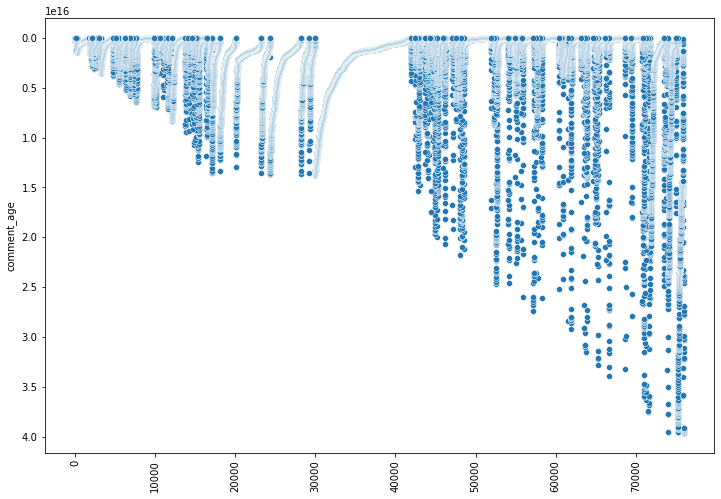

In [ ]:
# Comment Age
import matplotlib.pyplot as plt
import seaborn as sns

df_videos['publishedAt'] = pd.to_datetime(df_videos['publishedAt'])
df_videos.rename(columns={'videoId': 'video_id'}, inplace=True)

df_merged = df_comments.merge(df_videos, on='video_id', how='inner')
df_merged['comment_age'] = df_merged['published_at'] - df_merged['publishedAt']

plt.figure(figsize=(12,8))
sns.scatterplot(df_merged['comment_age'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show();